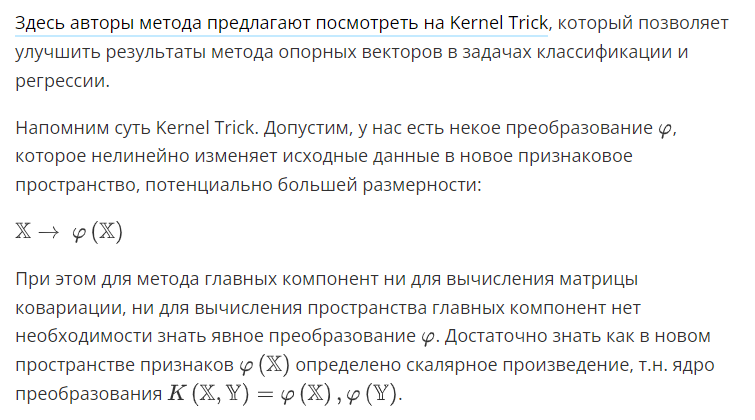

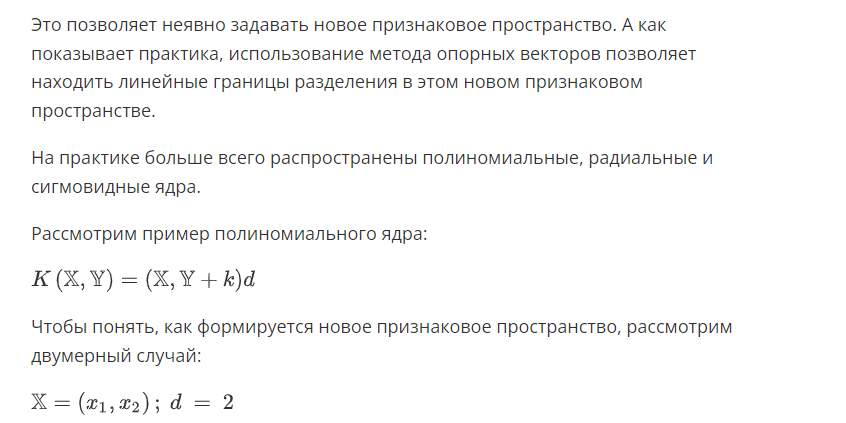

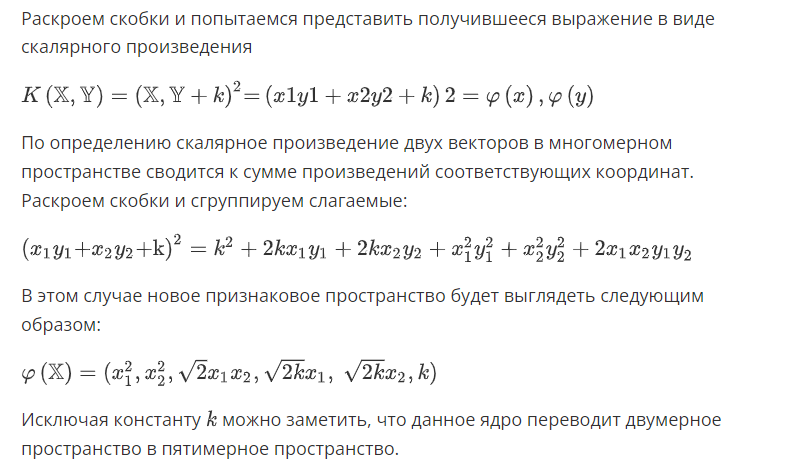

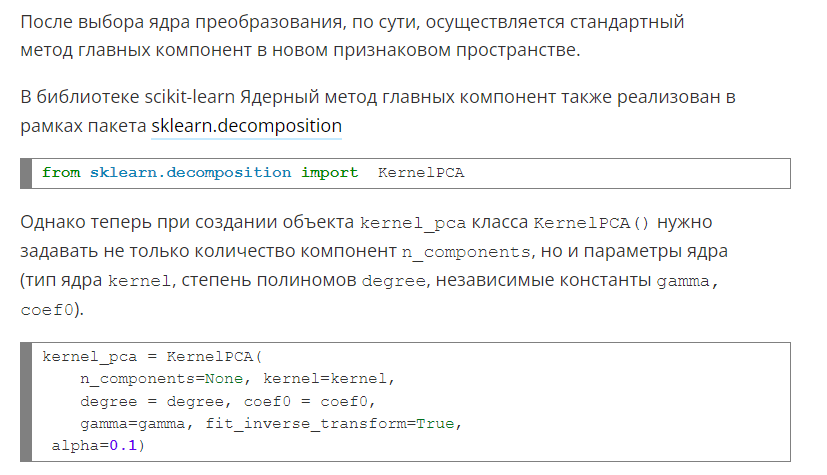

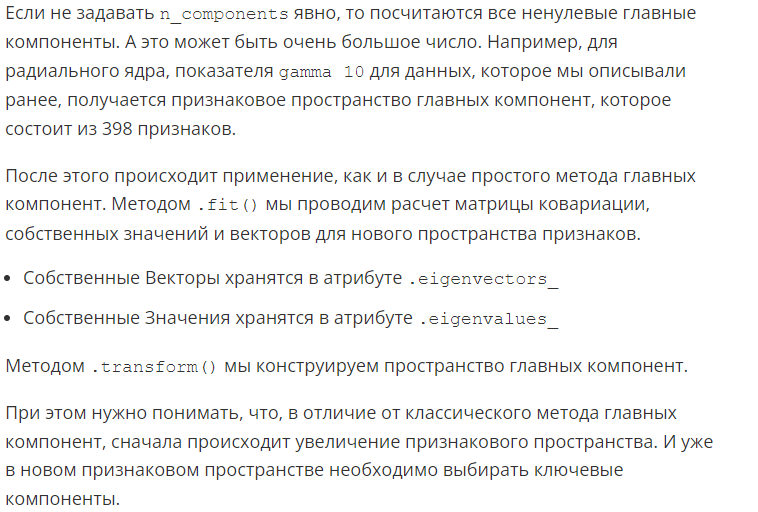

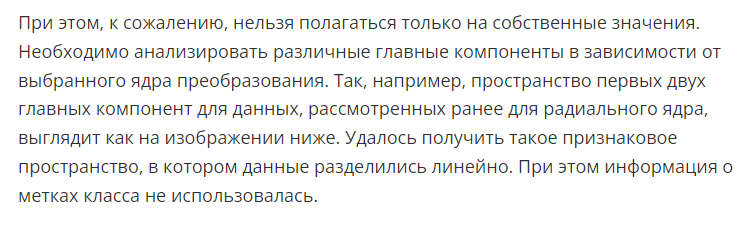

In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
from matplotlib.colors import ListedColormap # функция библиотеки Matplotlib, которая генерирует цветовую карту

from sklearn.datasets import make_moons, make_circles, make_classification # генерируемые наборы данных

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
# но в исполнении scikit-learn

In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Визуализация двумерных  данных для классификации
    Входные переменные:
    ===========
    ax:
    ds: набор данных, содержащий признаки X и целевые метки y
    name: название графика
    marker: тип маркера - по умолчанию просто круги
    colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    alpha: прозрачность маркеров
    s: размер маркера (~ квадрат радиуса)
    facecolor:
    """

    X, y = ds # распаковываем признаки и целевые метки в отдельные переменные

    cm_bright = ListedColormap(colors) # формируем цветовую карту из наших цветов
    ax.set_title(name, fontsize = 30) # прописываем название графика
    if facecolor: # если переменная задана - то просто рисуем скатерограмму по признакам с использованием параметров маркеров
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else: # иначе так же рисуем скатерограмму, но без
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)
    # немного красоты и ля аккуратности
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # фиксируем минимальные и максимальные значения по горизонтали
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # фиксируем минимальные и максимальные значения по вертикали
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):
    """Создание синтетического набора данных
    для бинарной классификации
    Входные переменные:
    ===========
    N: количество точек
    method: тип набора данных
    noises: коэффициент ~ сила шума
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    # фиксируем случайный seed
    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        # если выбран метод line (или никакой не задан)
        # то мы создаем набор данных с использованием функции make_classification
        # это будут линейно-разделимые данные
        X, y = make_classification(n_samples=N, # количество точек
                                   n_features=2, # количество признаков
                                   n_redundant=0, # количество бесполезных признаков
                                   n_informative=2,# количество информативных признаков
                                   n_clusters_per_class=1, # количество групп точек на класс
                                   class_sep=2, # количество классов
                                   random_state=random_state # фиксированный сид случайных чисел
                                   )
        X += np.random.randn(*X.shape) *noises # добавляем к признакам случайный шум

    elif method == 'moons':
        # если выбран метод moons
        # то мы создаем набор данных с использованием функции make_moons
        # это будут данные похожие на Инь-Ян
        X, y = make_moons(n_samples=N, # количество точек
                          noise=noises, # уровень шума
                          random_state=random_state # фиксированный сид случайных чисел
                          )

    elif method == 'circles':
        # если выбран метод circles
        # то мы создаем набор данных с использованием функции make_circles
        # это будут данные в виде концентрических окружностей
        X, y = make_circles(n_samples=N, # количество точек
                            noise=noises, # уровень шума
                            factor=0.3, # соотношение радиусов внуренней и внешней окружности
                            random_state=random_state # фиксированный сид случайных чисел
                            )


    return X,y

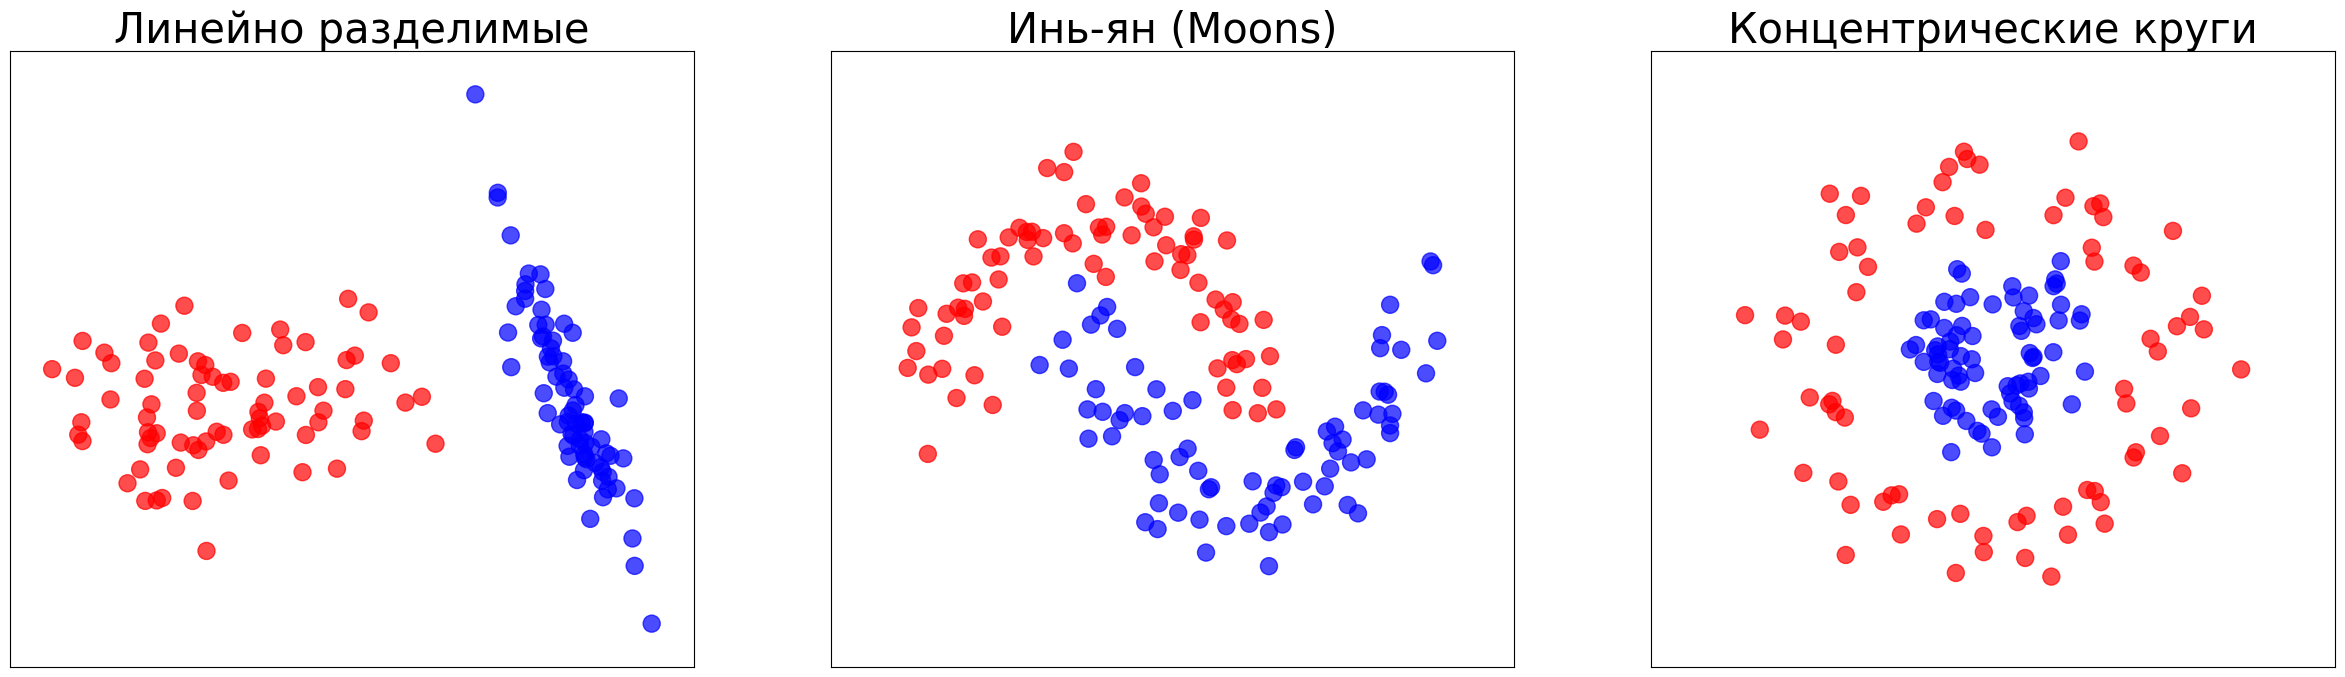

In [ ]:
#@title данные { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}
# слайдерами можно изменять количество точек и уровень шума
# И - Интерактивностб

fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line'),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons'),
          'Инь-ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles'),
          'Концентрические круги')


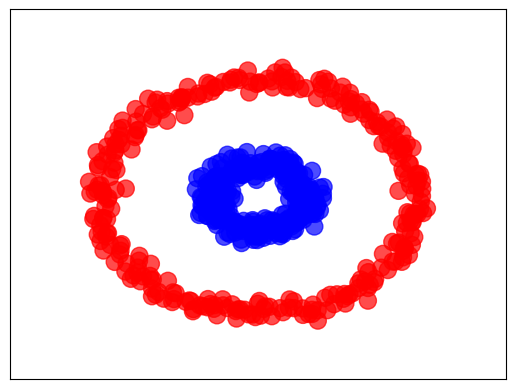

In [ ]:
N=600
X_circle,y_circle =make_binary_clf(N,method="circles",noises=0.05)
ax=plt.subplot(1,1,1)
plot_data(ax,(X_circle,y_circle))

#kernel_PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
#@title **НАСТРОЙКА ГИПЕРПАРАМЕТЕРОВ ЯДЕРНОГО ГЛАВНЫЙ КОМПРОНЕНТ**
#@markdown ### ВЫБОР ЯДРА
kernel = 'rbf'  #@param [ 'rbf' , 'linear', 'poly']{type:"string"}
#@markdown ### Параметры Ядер
coef0=2 #@param {type:"slider", min:0, max:5, step:0.5}
degree=3 #@param {type:"slider", min:1, max:5, step:1}
gamma=10.1 #@param {type:"slider", min:0.00, max:20, step:0.05}
#@markdown ### КОЛИЧЕСТВО ЯДЕР
n_components=0 #@param {type:"slider", min:0.00, max:100, step:1}

if n_components == 0:
  n_components=None

kernel_pca=KernelPCA(n_components=n_components,kernel=kernel, gamma=gamma,
            degree=degree, coef0 = coef0)

In [ ]:
kernel_pca.fit(X_circle)

KernelPCA(coef0=2, gamma=10.1, kernel='rbf')

In [ ]:
kpca_result=kernel_pca.transform(X_circle)

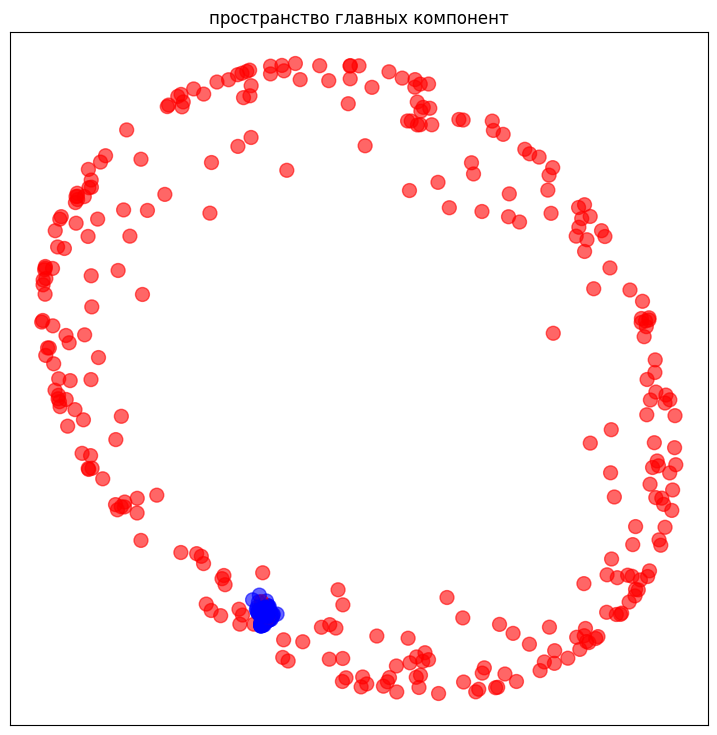

In [ ]:
#@title вызуализация компонент { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
x_component =  3 #@param {type:"slider", min:1, max:10, step:1}
y_component = 2 #@param {type:"slider", min:1, max:10, step:1}

fig=plt.figure(figsize=(9,9))

plt.scatter(kpca_result[:,x_component-1],
            kpca_result[:,y_component-1],
            alpha=0.6,s=100,
            c=y_circle,
            cmap="bwr");
plt.xticks([],[])
plt.yticks([],[])

plt.title("пространство главных компонент");

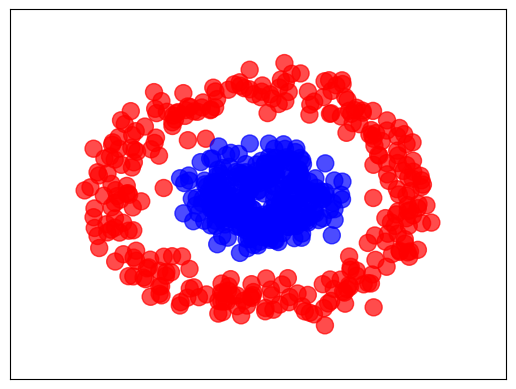

In [ ]:
N=600
X_circle,y_circle =make_binary_clf(N,method="circles",noises=0.11)
ax=plt.subplot(1,1,1)
plot_data(ax,(X_circle,y_circle))

Для данных с уровнем шума 0.11, соотношением между внешним и внутренним кругом 0.3 и количеством точек 600 примените ядерный метод главных компонент с полиномиальным ядром 3 степени, coef0 1, gamma 3, не указывайте явно n_components.

In [ ]:
#@title **НАСТРОЙКА ГИПЕРПАРАМЕТЕРОВ ЯДЕРНОГО ГЛАВНЫЙ КОМПРОНЕНТ**
#@markdown ### ВЫБОР ЯДРА
kernel = 'poly'  #@param [ 'rbf' , 'linear', 'poly']{type:"string"}
#@markdown ### Параметры Ядер
coef0=1 #@param {type:"slider", min:0, max:5, step:0.5}
degree=3 #@param {type:"slider", min:1, max:5, step:1}
gamma=3 #@param {type:"slider", min:0.00, max:20, step:0.05}
#@markdown ### КОЛИЧЕСТВО ЯДЕР
n_components=0 #@param {type:"slider", min:0.00, max:100, step:1}

if n_components == 0:
  n_components=None

kernel_pca=KernelPCA(n_components=n_components,kernel=kernel, gamma=gamma,
            degree=degree, coef0 = coef0)

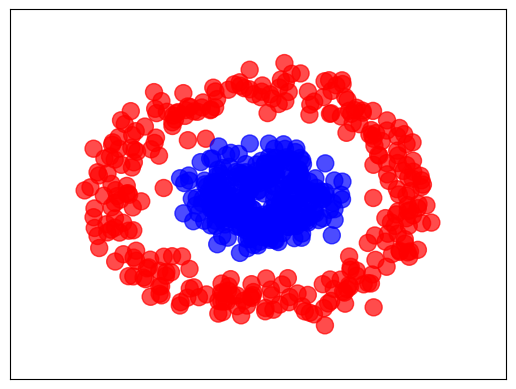

In [ ]:
N=600
X_circle,y_circle =make_binary_clf(N,method="circles",noises=0.11)
ax=plt.subplot(1,1,1)
plot_data(ax,(X_circle,y_circle))

In [ ]:
kernel_pca.fit(X_circle)

KernelPCA(gamma=3, kernel='poly')

Оцените количество главных компонент:

In [ ]:
result=kernel_pca.transform(X_circle)
result.shape

(600, 9)

Оцените сумму первых трех главных компонент:



In [ ]:
np.sum(np.sum(result[:,:3],axis=0),dtype=np.float64)

3.952393967665557e-14

In [ ]:
np.set_printoptions(suppress=True,formatter={'float_kind':":0.2f".format})
print(np.sum(np.sum(result[:,:3],axis=0)))

3.952393967665557e-14


Для данных с уровнем шума 0.11, соотношением между внешним и внутренним кругом 0.3 и количеством точек 600 примените ядерный метод главных компонент с радиальным ядром, gamma 5, не указывайте явно n_components.



In [ ]:
kernel_pca=KernelPCA(kernel="rbf", gamma=5,)

Оцените количество главных компонент:

In [ ]:
kp=kernel_pca.fit_transform(X_circle)
kp.shape

(600, 271)

In [ ]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
kp

array([[-0.368343, -0.064184, -0.217440, ..., -0.000001, 0.000000,
        0.000000],
       [0.391611, -0.241612, -0.542576, ..., 0.000000, -0.000001,
        0.000000],
       [0.459679, -0.118357, 0.541259, ..., -0.000000, -0.000000,
        0.000000],
       ...,
       [-0.366614, 0.091123, 0.129945, ..., -0.000000, -0.000000,
        -0.000000],
       [0.290000, -0.245431, -0.582667, ..., -0.000000, 0.000000,
        0.000000],
       [-0.373264, -0.066574, -0.192370, ..., 0.000001, -0.000000,
        0.000000]])

In [ ]:
kp[:,:50]

array([[-0.368343, -0.064184, -0.217440, ..., 0.001754, 0.024536,
        0.014181],
       [0.391611, -0.241612, -0.542576, ..., 0.015224, -0.002228,
        0.015597],
       [0.459679, -0.118357, 0.541259, ..., 0.016810, -0.005066,
        0.007069],
       ...,
       [-0.366614, 0.091123, 0.129945, ..., 0.010287, 0.013728,
        -0.005611],
       [0.290000, -0.245431, -0.582667, ..., 0.010953, 0.000327,
        0.020725],
       [-0.373264, -0.066574, -0.192370, ..., 0.003345, 0.019939,
        0.006722]])

In [ ]:
float(kp[:,:3].sum())

1.0658141036401503e-14

In [ ]:
print(f"{kp[:,:3].sum():.6f}")

0.000000


Будут ли данные линейно разделимы, если воспользоваться 2 и 4 главной компонентой?

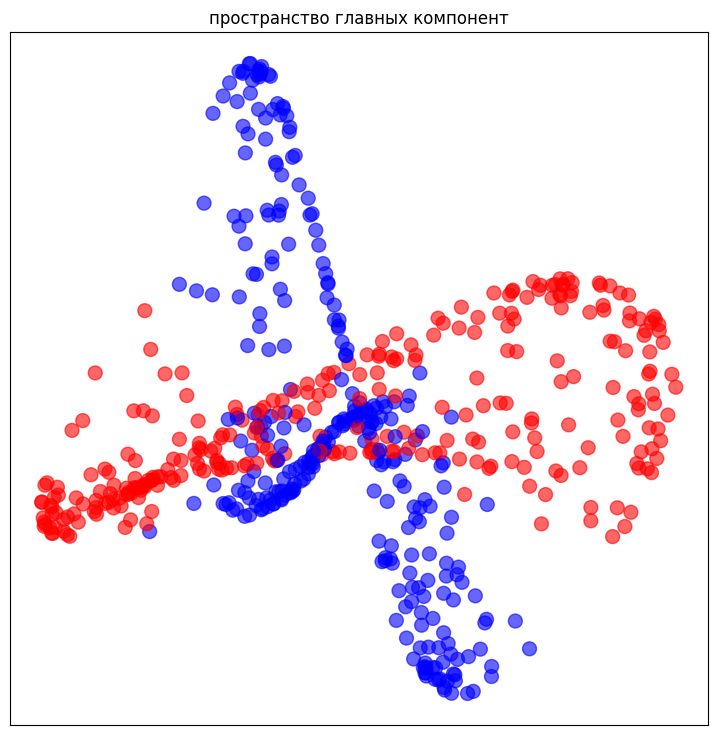

In [ ]:
#@title вызуализация компонент { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
x_component =  2 #@param {type:"slider", min:1, max:10, step:1}
y_component = 4 #@param {type:"slider", min:1, max:10, step:1}

fig=plt.figure(figsize=(9,9))

plt.scatter(kp[:,x_component-1],
            kp[:,y_component-1],
            alpha=0.6,s=100,
            c=y_circle,
            cmap="bwr");
plt.xticks([],[])
plt.yticks([],[])

plt.title("пространство главных компонент");

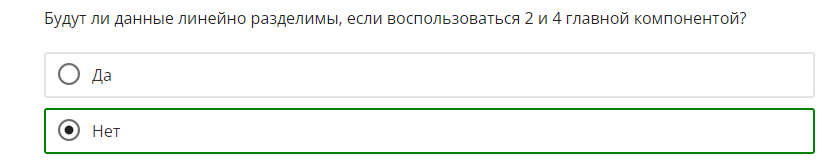

В ответе укажите только номер компонента без пробелов и запятых
Среди первых 4 компонент найдите такую комбинацию, при которой кольца поменяются местами (красное кольцо станет внешним, а синее — внутренним)

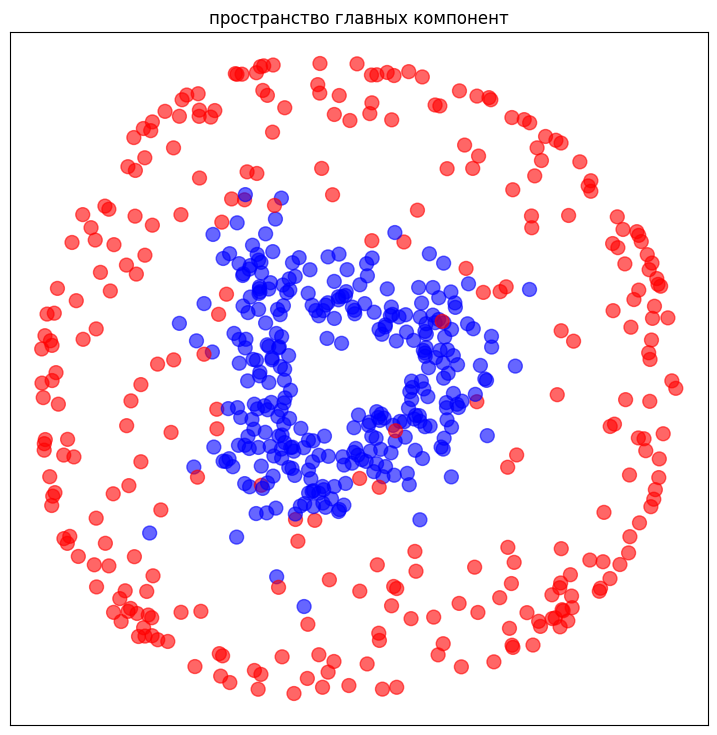

In [ ]:
#@title вызуализация компонент { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
x_component =  2 #@param {type:"slider", min:1, max:10, step:1}
y_component = 3 #@param {type:"slider", min:1, max:10, step:1}

fig=plt.figure(figsize=(9,9))

plt.scatter(kp[:,x_component-1],
            kp[:,y_component-1],
            alpha=0.6,s=100,
            c=y_circle,
            cmap="bwr");
plt.xticks([],[])
plt.yticks([],[])

plt.title("пространство главных компонент");